# Apply covariance matrix to i.i.d samples

In [1]:
import sandy

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

A multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions.
Such a distribution is specified by its mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$, as in

$$
\mathcal{N}\left(\mathbf{\mu}, \mathbf{\Sigma}\right)
$$

These parameters are analogous to the mean and variance of the one-dimensional normal distribution.

The covariance matrix $\mathbf{\Sigma}$ must be symmetric and positive-semidefinite (PSD) for proper sampling.

## Sample i.i.d parameters

Draw $N$ samples of independent and identically distributed (i.i.d.) variables, such as,

$$
\mathbf{Y} \sim \mathcal{N}\left( \mathbf{0}, \mathbf{1}\right)
$$ 

where

$$
\mathop{\mathbb{E}} \{ \mathbf{Y} \} \rightarrow \mathbf{0} =
\begin{bmatrix}
0\\
0\\
\end{bmatrix}
\;\;\text{and}\;\;
\mathop{\mathbb{E}} \{ \mathbf{Y} \mathbf{Y}^T \} \rightarrow \mathbf{1} =
\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}
$$


In [4]:
np.random.seed(seed=1)
nsmp = 5000
dim = 2
y = pd.DataFrame(np.random.randn(dim, nsmp), index=["A", "B"])
y.shape

(2, 5000)

Small correlation between parameters that goes to zero as $N \rightarrow \infty$

In [5]:
y.T.corr()

,A,B
A,1.00000e+00,7.30024e-03
B,7.30024e-03,1.00000e+00


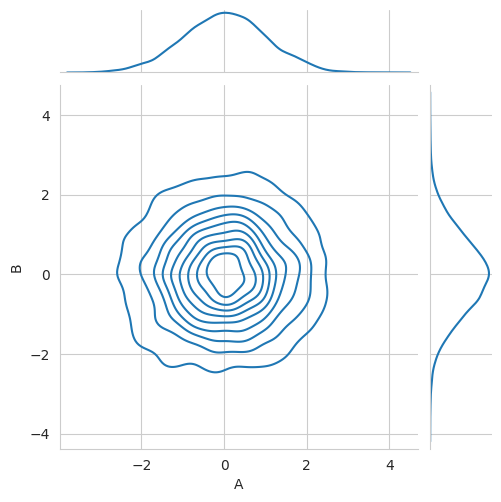

In [6]:
g = sns.jointplot(data=y.T, x="A", y="B", kind="kde")
g.figure.set_dpi(100)
g.figure.set_figwidth(5)
g.figure.set_figheight(5)

## Introduce covariance term to i.i.d parameters

Generate random 2x2 covariance matrix $\mathbf{\Sigma}$.

In [7]:
C = sandy.CategoryCov.random_cov(
    dim,
    stdmax=10,  # max stdev is 10%
    seed=5,  # fix seed for reproducibility
)
C.data.index = C.data.columns = ["A", "B"]
C.get_corr()

            A           B
A 1.00000e+00 7.41465e-01
B 7.41465e-01 1.00000e+00

In [8]:
# We assume standard deviations are relative (in %)
C.get_std()

A   4.88411e+00
B   6.11744e+00
Name: STD, dtype: float64

Application of covariance matrix to i.i.d. Normal samples.

$$
\mathbf{\Sigma} = \mathbf{L} \mathbf{L^T}
$$

$$
\mathbf{Z} = \mathbf{L} \mathbf{Y} =
\begin{bmatrix}
l_{1,1} & 0\\
l_{2,1} & l_{2,2} \\
\end{bmatrix}
\begin{bmatrix}
y_{1,1} & \dots & y_{1,N} \\
y_{2,1} & \dots & y_{2,N}\\
\end{bmatrix} = 
\begin{bmatrix}
l_{1,1}y_{1,1} & l_{1,1}y_{1,2} & \dots & l_{1,1}y_{1,N} \\
l_{2,1}y_{1,1} + l_{2,2}y_{2,2} & l_{2,1}y_{1,2} + l_{2,2}y_{2,2} & \dots & l_{2,1}y_{1,N} + l_{2,2}y_{2,N}\\
\end{bmatrix}
$$

with
$$
Z\sim\mathcal{N}\left( \mathbf{0}, \mathbf{\Sigma}\right)
$$

Mean and covariance of generated samples $\mathbf{Z}$:

$$
\mathop{\mathbb{E}} \{ \mathbf{Z} \} =
\mathop{\mathbb{E}} \{ \mathbf{L} \mathbf{Y} \} =
\mathbf{L} \mathop{\mathbb{E}} \{ \mathbf{Y} \} = \mathbf{0}
$$

$$
\mathop{\mathbb{E}} \{ \mathbf{Z} \mathbf{Z}^T \} =
\mathop{\mathbb{E}} \{\left( \mathbf{L} \mathbf{Y} \right) \left( \mathbf{L} \mathbf{Y} \right)^T \} =
\mathop{\mathbb{E}} \{ \mathbf{L}^T \mathbf{Y}^T \mathbf{Y} \mathbf{L} \} =
\mathop{\mathbb{E}} \{ \mathbf{L}^T \mathbf{L} \} =
\mathbf{\Sigma}
$$

In [9]:
samples = C.sampling(nsmp).data.T
samples.shape

(2, 5000)

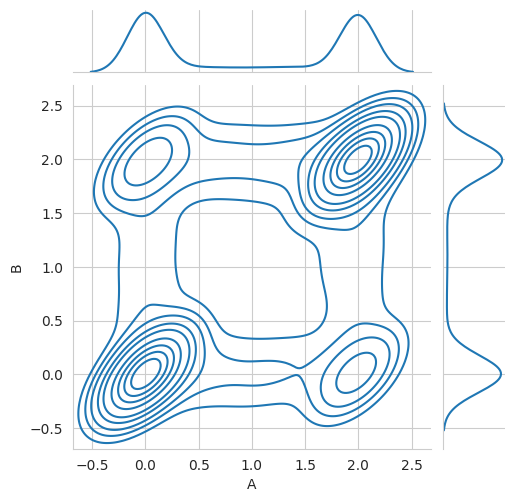

In [10]:
g = sns.jointplot(data=samples.T, x="A", y="B", kind="kde")
g.figure.set_dpi(100)
g.figure.set_figwidth(5)
g.figure.set_figheight(5)

In [11]:
samples.T.corr()

,A,B
A,1.00000e+00,5.78792e-01
B,5.78792e-01,1.00000e+00


In [12]:
samples.T.std()

A   9.38436e-01
B   9.54275e-01
dtype: float64